In [3]:
#pytorch main site
!pip install torch torchvision torchaudio 

In [ ]:
!pip install ultralytics

In [5]:
#!git clone https://github.com/ultralytics/yolov5
!cd yolov5
!pip install -r requirements.txt

In [4]:
import torch #Load YOLO model and make detections
from matplotlib import pyplot as plt # visualizing images
import numpy as np #array transformations
import cv2 # access and render webcam feed

## **Custom Detection**
Similar to a focus detection, Shows `Alive` when subject is focussed and `Zombie` when unfocussed.
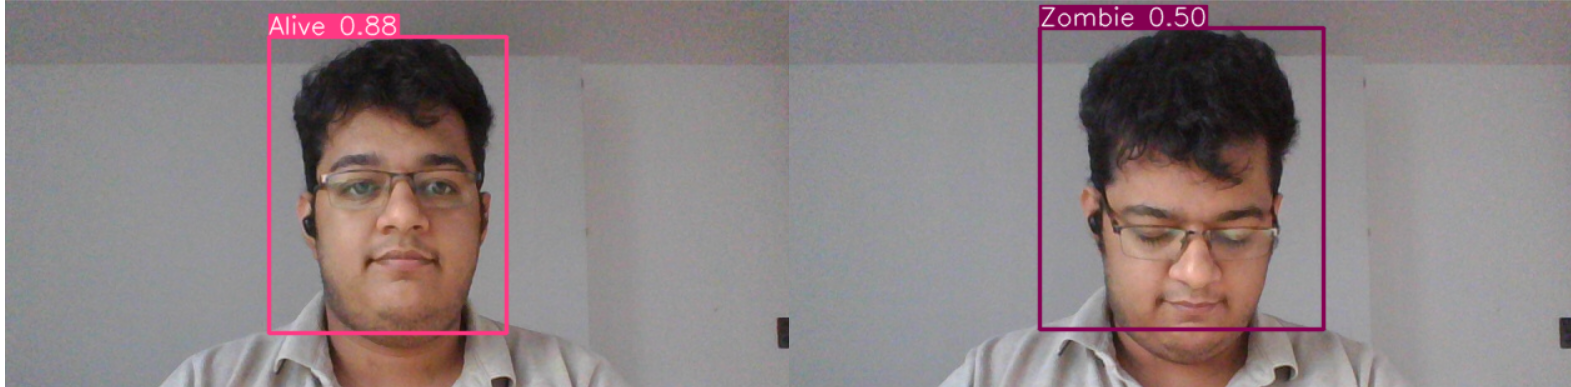
### image Collection

In [2]:
#labelling Purpose
import uuid # unique identifier
import os # leveraging file opns
import time # Collection param


In [10]:
IMAGES_PATH=os.path.join('data','images')
labels =["Alive","Zombie"]
num_imgs=20

In [11]:
def imageCollection():
    vidCap=cv2.VideoCapture(0)
    # Loop through labels
    for label in labels:
        print("Collecting Images for {}".format(label))
        time.sleep(5)
        
        # Loop through Image Range
        for img_num in range(num_imgs):
            print("Collecting images for {}, image number {}".format(label, img_num))
            # vid Capture/feed
            ret, frame =vidCap.read()
            imgName=os.path.join(IMAGES_PATH,label+'.'+str(uuid.uuid1())+'.jpg')
            #write out image to file
            cv2.imwrite(imgName,frame)
            # render to screen
            cv2.imshow('Image Collection', frame)
            time.sleep(2)
            
            if cv2.waitKey(10) & 0xFF==ord('q'):
                break
    vidCap.release()
    cv2.destroyAllWindows()

imageCollection()

In [38]:
# labelimg
#!git clone https://github.com/tzutalin/labelImg
#!pip install pyqt lxml --upgrade
#!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

ERROR: Could not find a version that satisfies the requirement pyqt (from versions: none)
ERROR: No matching distribution found for pyqt


### Training

In [4]:
# Training with custom Dataset- Commented cf incompatible in current laptop, try running in google colab
#!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yaml --weights yolov5s.pt --device CPU

### Deployment

In [13]:
def vidCapDeadDetection():
    model = torch.hub.load('ultralytics/yolov5','custom', path="yolov5/runs/train/exp/weights/lastN.pt", force_reload=True)
    vidCap=cv2.VideoCapture(0) # cv2.VideoCapture('vidName.mp4') for detection on a video.
    while vidCap.isOpened():
        ret, frame =vidCap.read()
        # detection made from model, Passing the frame into model and render the results of the prediction.
        rslt=model(frame)
        cv2.imshow('Dead Detection V5',np.squeeze(rslt.render()))
        
        if cv2.waitKey(10) & 0xFF==ord('q'):
            break
    vidCap.release()
    cv2.destroyAllWindows()

In [12]:
vidCapDeadDetection()

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\cecil/.cache\torch\hub\master.zip
YOLOv5  2023-2-9 Python-3.9.13 torch-1.8.1+cu111 CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


# Image Segmentation using YOLOV8
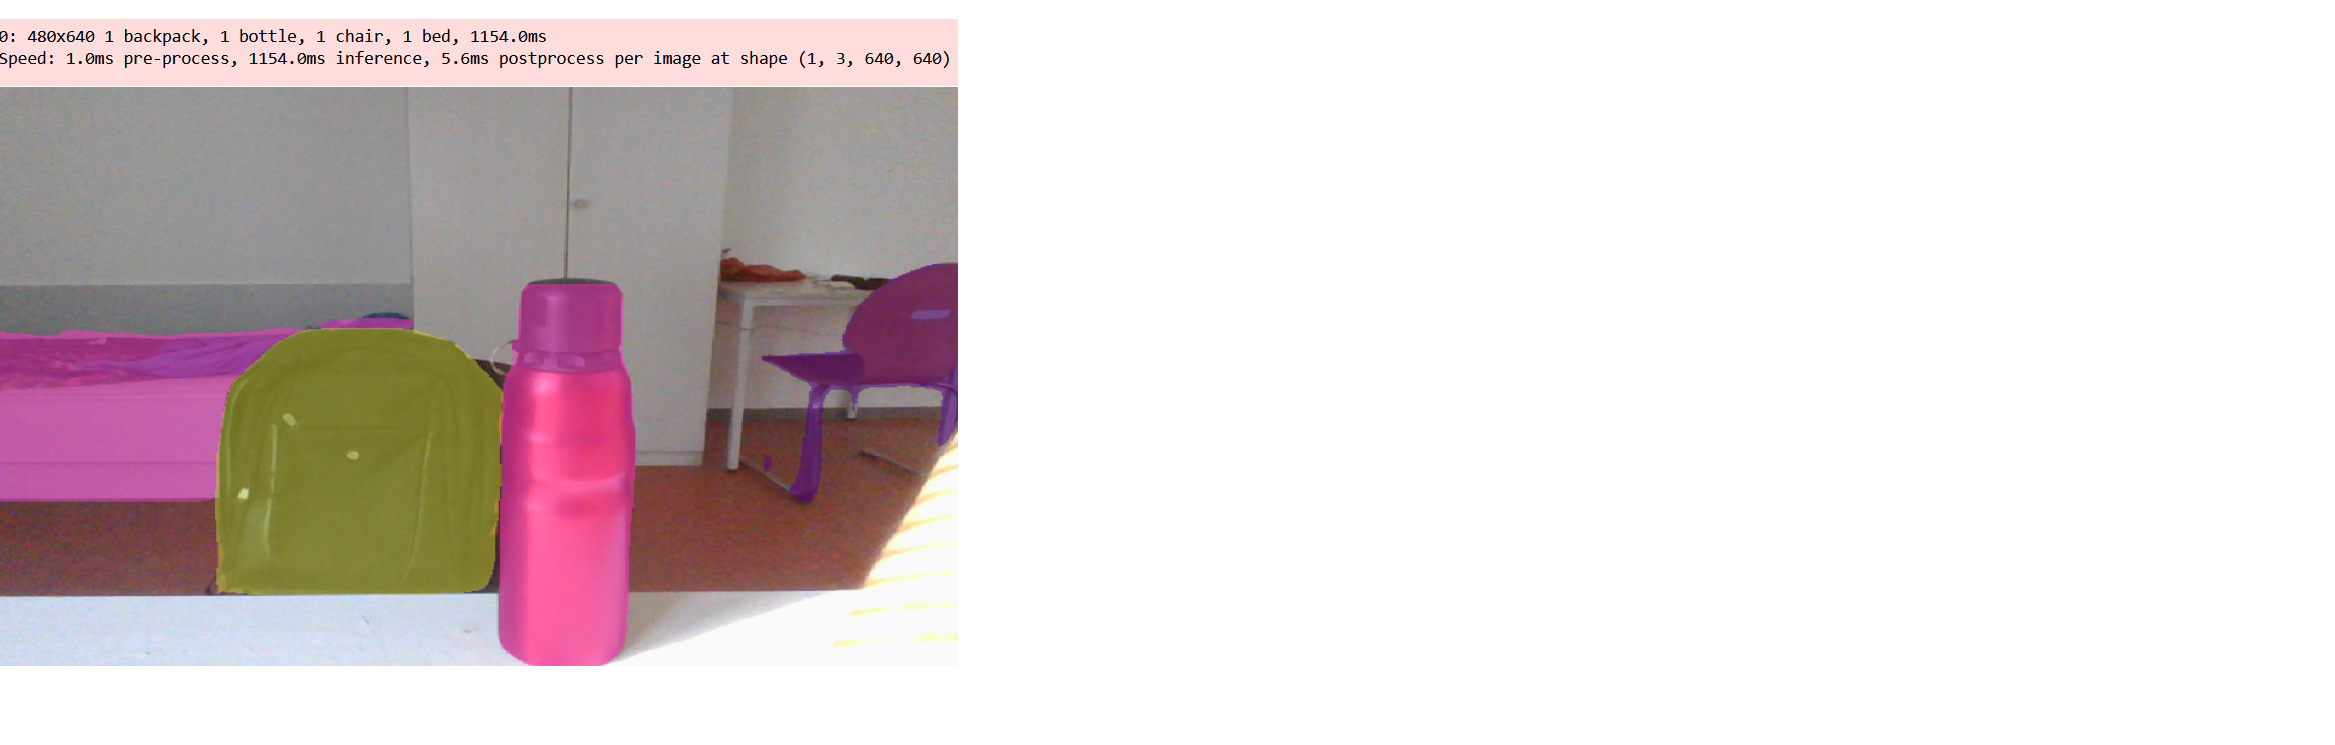

In [8]:
from ultralytics import YOLO

In [9]:
def vidCapYoloV8Segmentation():
    model = model=YOLO('yolov8l-seg.pt')# using predefined model, not Custom
    vidCap=cv2.VideoCapture(0) # cv2.VideoCapture('vidName.mp4') for detection on a video.
    while vidCap.isOpened():
        ret, frame =vidCap.read()
        # detection made from model, Passing the frame into model and render the results of the prediction.
        rslt=model(frame)
        cv2.imshow('YOLOV8 live Frame Segmentation', frame)
        
        if cv2.waitKey(10) & 0xFF==ord('q'):
            break
    vidCap.release()
    cv2.destroyAllWindows()

In [11]:
vidCapYoloV8Segmentation()

Ultralytics YOLOv8.0.32  Python-3.9.13 torch-1.8.1+cu111 CPU
YOLOv8l-seg summary (fused): 295 layers, 45973568 parameters, 0 gradients, 220.5 GFLOPs

0: 480x640 1 person, 1 backpack, 1 bottle, 2 beds, 1552.8ms
Speed: 1.0ms pre-process, 1552.8ms inference, 22.0ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 1 backpack, 1 umbrella, 1 bottle, 1 bed, 1031.9ms
Speed: 0.0ms pre-process, 1031.9ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 1 backpack, 1 bottle, 1 bed, 1045.5ms
Speed: 1.0ms pre-process, 1045.5ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 1 person, 1 backpack, 1 bottle, 2 beds, 1086.7ms
Speed: 0.5ms pre-process, 1086.7ms inference, 8.0ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 1 person, 1 backpack, 1 bottle, 1 bed, 1077.0ms
Speed: 0.0ms pre-process, 1077.0ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 1 backpack, 1 bottle, 1 chair, 1 bed, 1098.9